# Homework 10

### Your task now is to construct a neural network (in Keras) that learns clasification on this data set. Try to optimize and regularize it with the methods you have learned in class and by going thrugh this notebook. What is the best validation dataset score you can achieve?

Here's what you should take away from this example:

- If you are trying to classify data points between N classes, your network should end with a Dense layer of size N.
- In a single-label, multi-class classification problem, your network should end with a softmax activation, so that it will output a probability distribution over the N output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network, and the true distribution of the targets.
- There are two ways to handle labels in multi-class classification: Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using categorical_crossentropy as your loss function. Encoding the labels as integers and using the sparse_categorical_crossentropy loss function.
- If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having intermediate layers that are too small.


## Preparing the data set

In [1]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print("Length of training data : {}, length of test data: {} ". format (len(train_data), len(test_data)))

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

number_of_classes = len(set(train_labels))
print("Number of classes: {} (last layer size)".format(number_of_classes))

Using TensorFlow backend.


Length of training data : 8982, length of test data: 2246 
Number of classes: 46 (last layer size)


Just to handle initializing errors .. 

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Creating neural networks


In [24]:
from keras import layers, models, optimizers, regularizers


input_shape = len(x_train[0])
network = models.Sequential()
network.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network.add(layers.Dense(number_of_classes, activation='softmax'))


In [25]:
def prepare_and_fit(model, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels,
                    optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)):
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    fitted = model.fit(x_train, one_hot_train_labels, validation_data=(x_test, one_hot_test_labels), 
                              epochs=epochs, batch_size=512, verbose=1)
    evalueted = model.evaluate(x_test, one_hot_test_labels, verbose=1)
    
    print("Test loss {} , test accuracy {}".format(evalueted[0], evalueted[1]))   
    return {'history': fitted, 'score': evalueted}

In [26]:
result = prepare_and_fit(network, 10, x_train, x_test, one_hot_train_labels, one_hot_test_labels)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 8s 853us/step - loss: 1.6533 - acc: 0.6534 - val_loss: 1.0967 - val_acc: 0.7542
Epoch 2/10
8982/8982 [==============================] - 6s 667us/step - loss: 0.6806 - acc: 0.8593 - val_loss: 0.9282 - val_acc: 0.7898
Epoch 3/10
8982/8982 [==============================] - 6s 661us/step - loss: 0.4186 - acc: 0.9120 - val_loss: 0.8428 - val_acc: 0.8108
Epoch 4/10
8982/8982 [==============================] - 6s 701us/step - loss: 0.2901 - acc: 0.9392 - val_loss: 0.8514 - val_acc: 0.8077
Epoch 5/10
8982/8982 [==============================] - 6s 714us/step - loss: 0.2246 - acc: 0.9459 - val_loss: 0.8972 - val_acc: 0.8068
Epoch 6/10
8982/8982 [==============================] - 7s 782us/step - loss: 0.1936 - acc: 0.9496 - val_loss: 0.9284 - val_acc: 0.8023
Epoch 7/10
8982/8982 [==============================] - 7s 830us/step - loss: 0.1680 - acc: 0.9518 - val_loss: 1.0080 - val_acc: 0.7916


In [36]:
import matplotlib.pyplot as plt


def plot_loss(model_history, epochs):
    plt.figure(figsize=(16, 10))
    plt.plot(range(epochs),model_history.history['loss'],'bo--', label='Training loss')
    plt.plot(range(epochs),model_history.history['val_loss'],'go--',label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.legend()

    plt.show()
    
def plot_accuracy(model_history, epochs):
    plt.figure(figsize=(16, 10))
    plt.plot(range(epochs),model_history.history['acc'],'bo--', label='Training accuracy')
    plt.plot(range(epochs),model_history.history['val_acc'],'go--',label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.legend()

    plt.show()


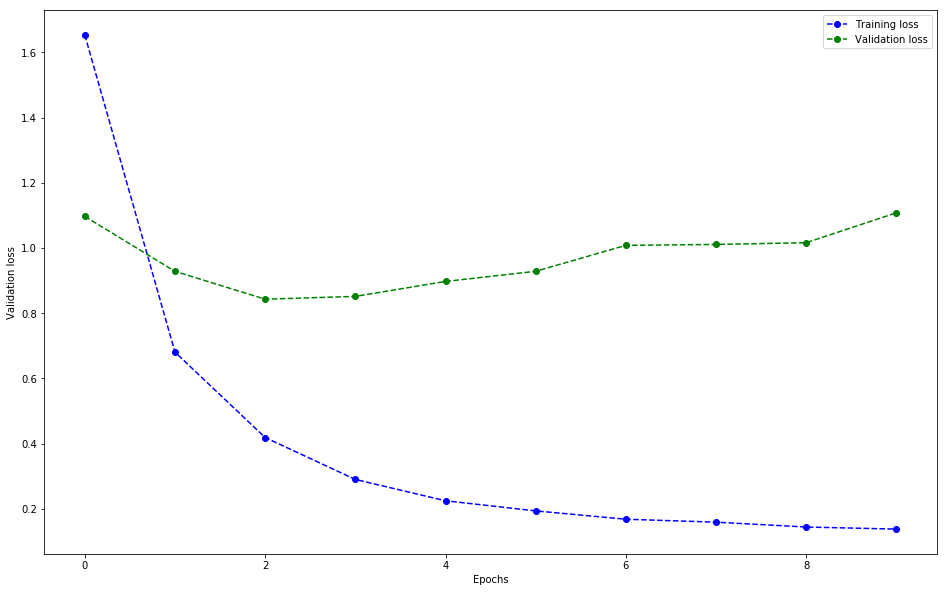

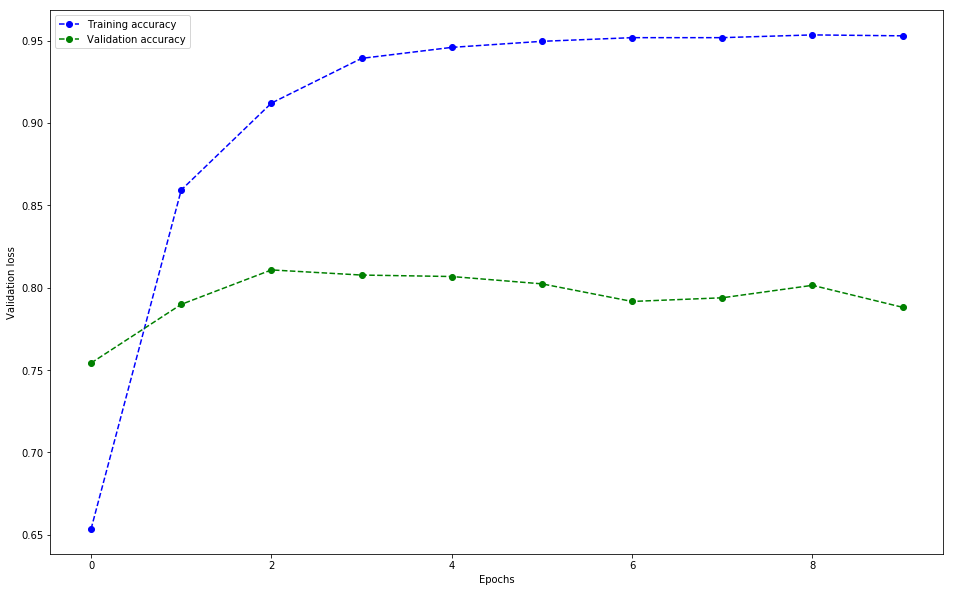

In [37]:
plot_loss(result['history'], 10)
plot_accuracy(result['history'], 10)


### More danse layers 

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 10s 1ms/step - loss: 1.9855 - acc: 0.5318 - val_loss: 1.3052 - val_acc: 0.6981
Epoch 2/10
8982/8982 [==============================] - 6s 718us/step - loss: 0.9898 - acc: 0.7665 - val_loss: 1.1184 - val_acc: 0.7360
Epoch 3/10
8982/8982 [==============================] - 7s 760us/step - loss: 0.6286 - acc: 0.8503 - val_loss: 1.0297 - val_acc: 0.7703
Epoch 4/10
8982/8982 [==============================] - 7s 826us/step - loss: 0.3956 - acc: 0.9078 - val_loss: 0.9429 - val_acc: 0.8063
Epoch 5/10
8982/8982 [==============================] - 7s 760us/step - loss: 0.2872 - acc: 0.9321 - val_loss: 0.9820 - val_acc: 0.7979
Epoch 6/10
8982/8982 [==============================] - 7s 755us/step - loss: 0.1978 - acc: 0.9468 - val_loss: 1.0284 - val_acc: 0.7952
Epoch 7/10
8982/8982 [==============================] - 7s 755us/step - loss: 0.1651 - acc: 0.9528 - val_loss: 1.1456 - val_acc: 0.7841
E

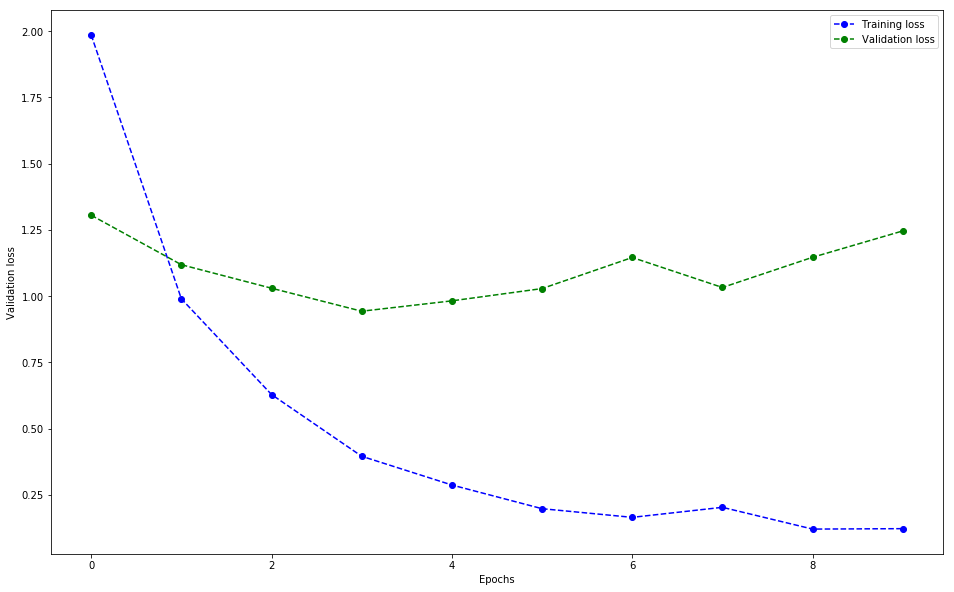

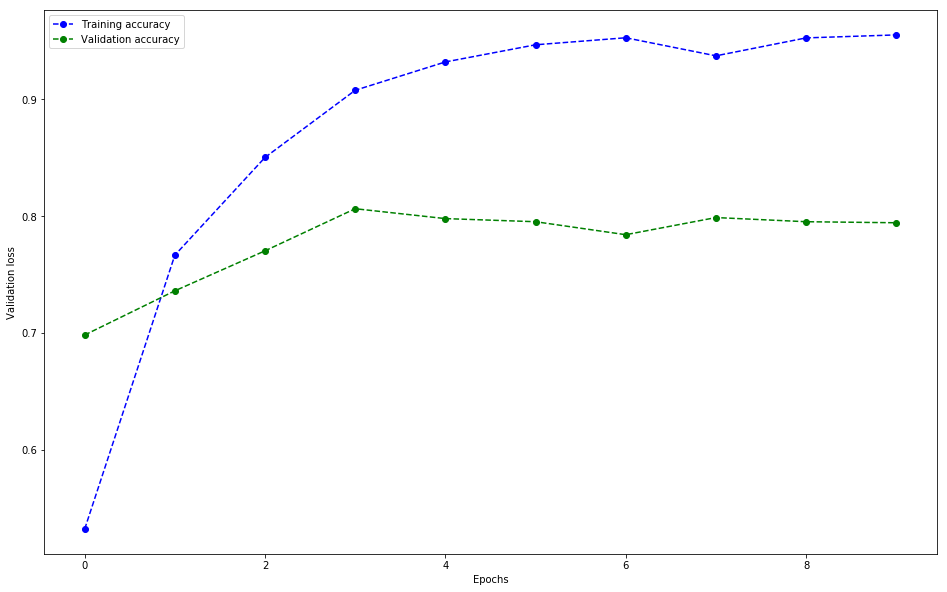

In [53]:

network_2 = models.Sequential()
network_2.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_2.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_2.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_2.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_2 = prepare_and_fit(network_2, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_2['history'], epochs)
plot_accuracy(result_2['history'],epochs)

### Smaller danse layers


Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 6s 616us/step - loss: 2.0111 - acc: 0.5377 - val_loss: 1.4342 - val_acc: 0.6794
Epoch 2/10
8982/8982 [==============================] - 3s 382us/step - loss: 1.0640 - acc: 0.7555 - val_loss: 1.0881 - val_acc: 0.7591
Epoch 3/10
8982/8982 [==============================] - 4s 425us/step - loss: 0.7392 - acc: 0.8283 - val_loss: 0.9969 - val_acc: 0.7778
Epoch 4/10
8982/8982 [==============================] - 4s 418us/step - loss: 0.5136 - acc: 0.8783 - val_loss: 0.9953 - val_acc: 0.7716
Epoch 5/10
8982/8982 [==============================] - 4s 401us/step - loss: 0.3291 - acc: 0.9243 - val_loss: 1.0082 - val_acc: 0.7841
Epoch 6/10
8982/8982 [==============================] - 4s 420us/step - loss: 0.2621 - acc: 0.9364 - val_loss: 1.2161 - val_acc: 0.7404
Epoch 7/10
8982/8982 [==============================] - 4s 425us/step - loss: 0.2097 - acc: 0.9480 - val_loss: 1.1012 - val_acc: 0.7823


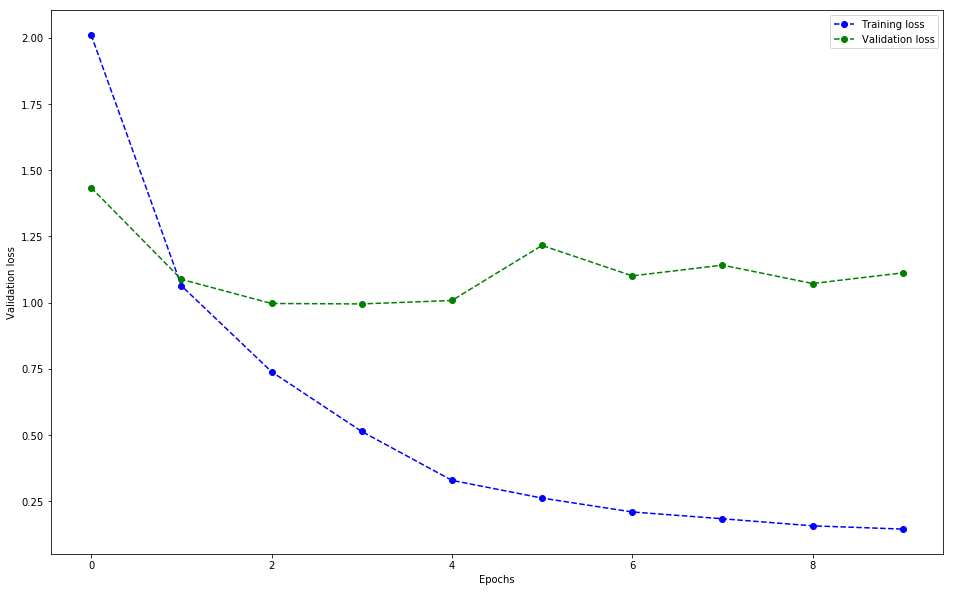

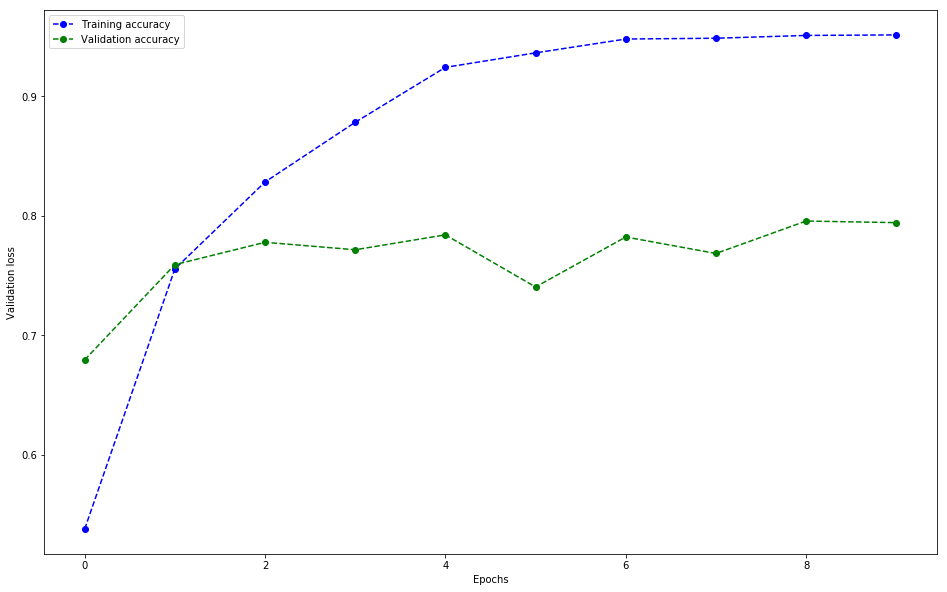

In [39]:
network_3 = models.Sequential()
network_3.add(layers.Dense(200, activation='relu', input_shape=(input_shape,)))
network_3.add(layers.Dense(200, activation='relu', input_shape=(input_shape,)))
network_3.add(layers.Dense(200, activation='relu', input_shape=(input_shape,)))
network_3.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_3 = prepare_and_fit(network_3, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_3['history'], epochs)
plot_accuracy(result_3['history'],epochs)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 5s 604us/step - loss: 0.1961 - acc: 0.9379 - val_loss: 1.0986 - val_acc: 0.8001
Epoch 2/10
8982/8982 [==============================] - 4s 454us/step - loss: 0.1202 - acc: 0.9535 - val_loss: 1.1134 - val_acc: 0.7952
Epoch 3/10
8982/8982 [==============================] - 4s 451us/step - loss: 0.1212 - acc: 0.9523 - val_loss: 1.1518 - val_acc: 0.7996
Epoch 4/10
8982/8982 [==============================] - 3s 370us/step - loss: 0.1156 - acc: 0.9550 - val_loss: 1.2083 - val_acc: 0.7961
Epoch 5/10
8982/8982 [==============================] - 3s 382us/step - loss: 0.1121 - acc: 0.9535 - val_loss: 1.3349 - val_acc: 0.7903
Epoch 6/10
8982/8982 [==============================] - 3s 372us/step - loss: 0.1070 - acc: 0.9551 - val_loss: 1.2055 - val_acc: 0.7934
Epoch 7/10
8982/8982 [==============================] - 3s 374us/step - loss: 0.1036 - acc: 0.9555 - val_loss: 1.4115 - val_acc: 0.7752


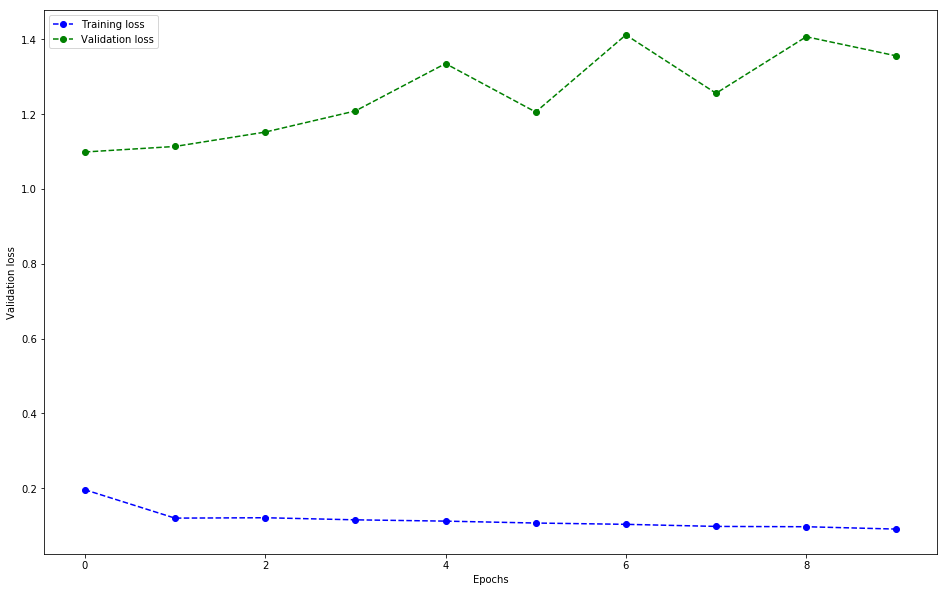

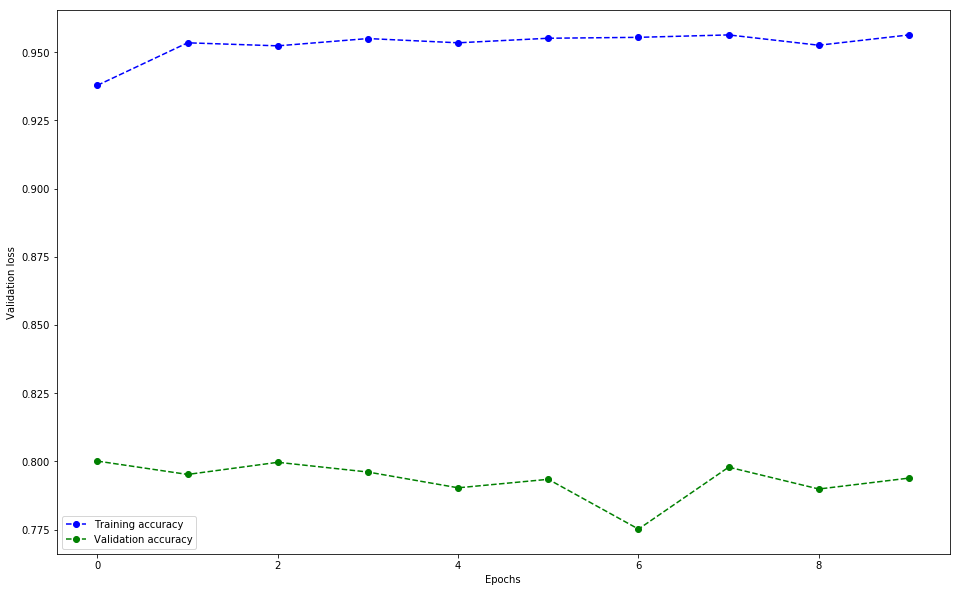

In [40]:

## Small dance layer with less layers 
network_4 = models.Sequential()
network_4.add(layers.Dense(200, activation='relu', input_shape=(input_shape,)))
network_4.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_4 = prepare_and_fit(network_3, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_4['history'], epochs)
plot_accuracy(result_4['history'],epochs)

Smaller danse layer worsen the results.

### Reguralization

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 12s 1ms/step - loss: 303.1193 - acc: 0.3289 - val_loss: 115.2489 - val_acc: 0.3620
Epoch 2/10
8982/8982 [==============================] - 9s 1ms/step - loss: 89.1422 - acc: 0.3517 - val_loss: 63.6201 - val_acc: 0.3620
Epoch 3/10
8982/8982 [==============================] - 10s 1ms/step - loss: 49.3253 - acc: 0.3517 - val_loss: 36.3832 - val_acc: 0.3620
Epoch 4/10
8982/8982 [==============================] - 10s 1ms/step - loss: 31.9734 - acc: 0.3517 - val_loss: 29.9768 - val_acc: 0.3620
Epoch 5/10
8982/8982 [==============================] - 11s 1ms/step - loss: 29.9446 - acc: 0.3517 - val_loss: 29.6647 - val_acc: 0.3620
Epoch 6/10
8982/8982 [==============================] - 9s 1ms/step - loss: 29.3333 - acc: 0.3634 - val_loss: 28.5853 - val_acc: 0.4969
Epoch 7/10
8982/8982 [==============================] - 9s 1ms/step - loss: 28.5395 - acc: 0.4832 - val_loss: 28.3259 - val_acc: 0

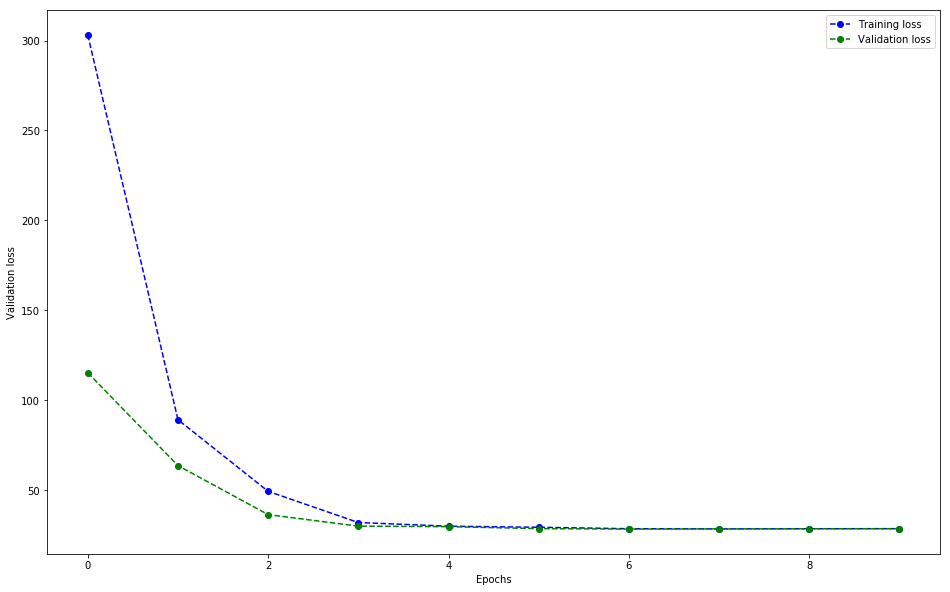

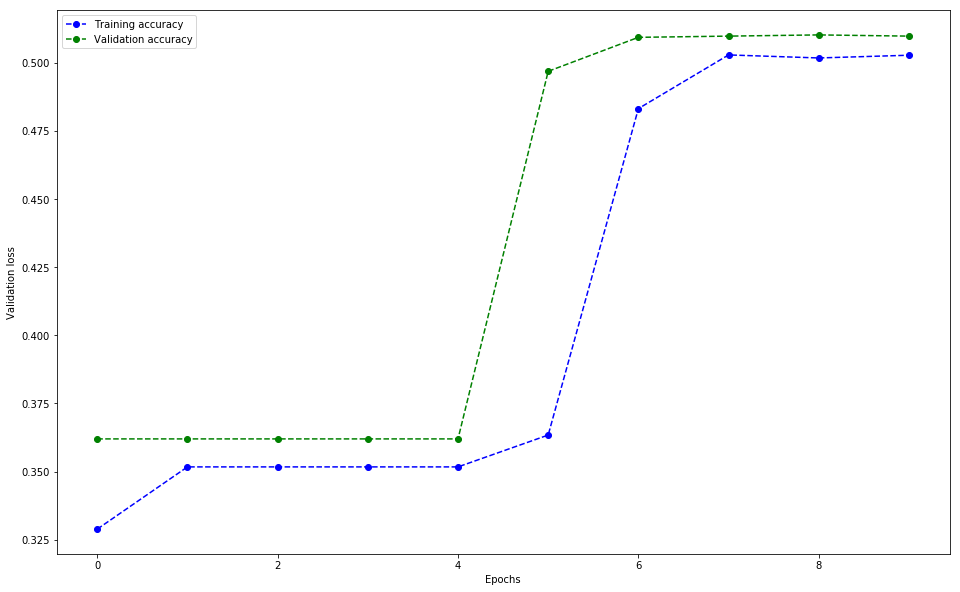

In [43]:

# L1
network_5 = models.Sequential()
network_5.add(layers.Dense(500,kernel_regularizer=regularizers.l1(0.01), activation='relu', input_shape=(input_shape,)))
network_5.add(layers.Dense(500,kernel_regularizer=regularizers.l1(0.01), activation='relu', input_shape=(input_shape,)))
network_5.add(layers.Dense(500,kernel_regularizer=regularizers.l1(0.01), activation='relu', input_shape=(input_shape,)))
network_5.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_5 = prepare_and_fit(network_5, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_5['history'], epochs)
plot_accuracy(result_5['history'],epochs)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 13s 1ms/step - loss: 40.5884 - acc: 0.5018 - val_loss: 17.2948 - val_acc: 0.5125
Epoch 2/10
8982/8982 [==============================] - 9s 980us/step - loss: 28.4175 - acc: 0.5080 - val_loss: 15.6806 - val_acc: 0.5085
Epoch 3/10
8982/8982 [==============================] - 9s 956us/step - loss: 27.5813 - acc: 0.5116 - val_loss: 15.5399 - val_acc: 0.5178
Epoch 4/10
8982/8982 [==============================] - 8s 936us/step - loss: 27.4932 - acc: 0.5107 - val_loss: 15.6177 - val_acc: 0.5107
Epoch 5/10
8982/8982 [==============================] - 9s 967us/step - loss: 27.4144 - acc: 0.5090 - val_loss: 15.5907 - val_acc: 0.5147
Epoch 6/10
8982/8982 [==============================] - 9s 963us/step - loss: 26.8091 - acc: 0.5084 - val_loss: 15.1718 - val_acc: 0.5125
Epoch 7/10
8982/8982 [==============================] - 9s 1ms/step - loss: 25.6483 - acc: 0.5081 - val_loss: 14.9411 - val_a

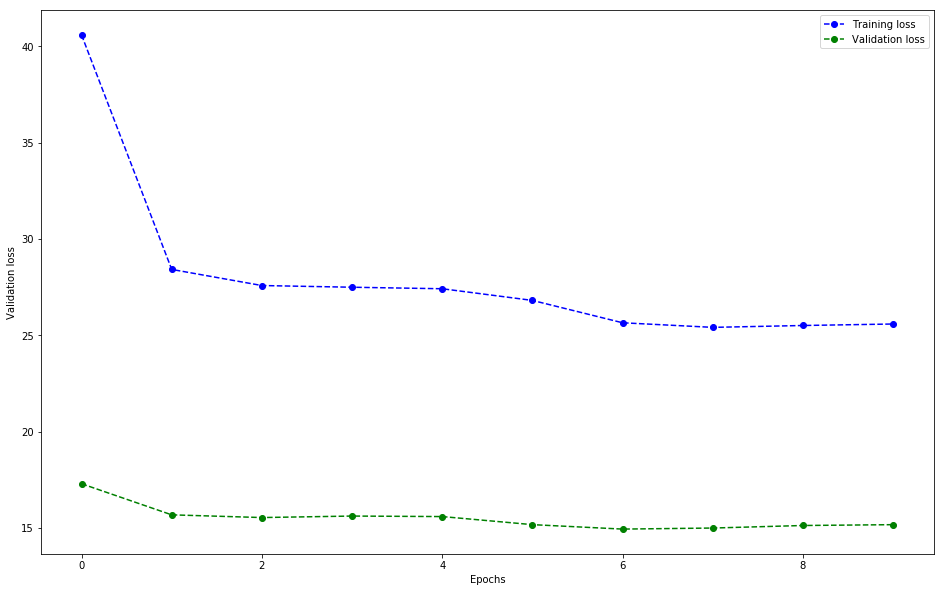

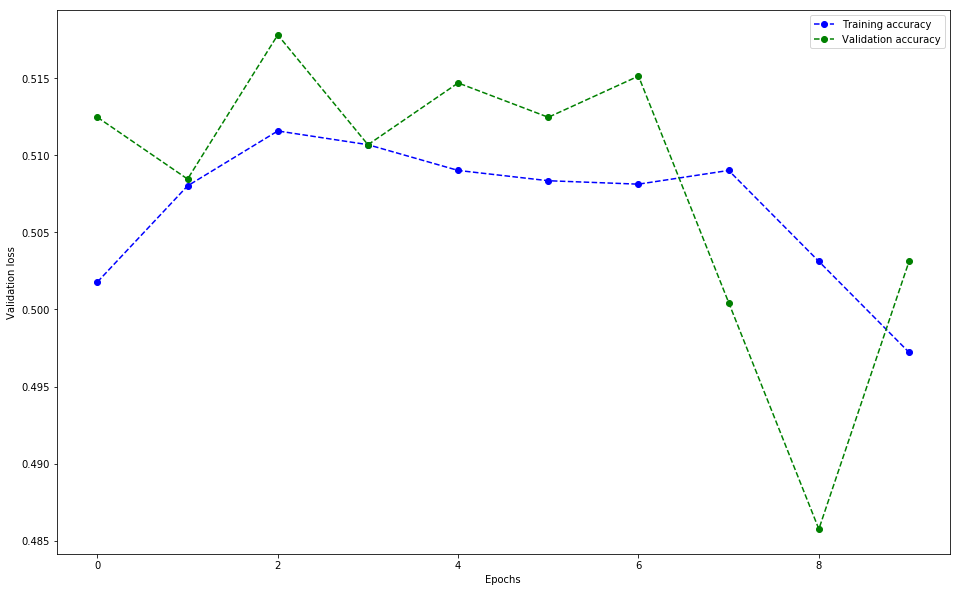

In [45]:
network_7 = models.Sequential()
network_7.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_7.add(layers.Dense(500,kernel_regularizer=regularizers.l1(0.01), activation='relu', input_shape=(input_shape,)))
network_7.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_7.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_7 = prepare_and_fit(network_5, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_7['history'], epochs)
plot_accuracy(result_7['history'],epochs)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 12s 1ms/step - loss: 42.9558 - acc: 0.5008 - val_loss: 8.5776 - val_acc: 0.5018
Epoch 2/10
8982/8982 [==============================] - 9s 987us/step - loss: 29.3595 - acc: 0.5032 - val_loss: 7.9349 - val_acc: 0.5089
Epoch 3/10
8982/8982 [==============================] - 10s 1ms/step - loss: 28.6098 - acc: 0.5029 - val_loss: 8.2493 - val_acc: 0.5053
Epoch 4/10
8982/8982 [==============================] - 9s 1ms/step - loss: 28.5958 - acc: 0.5029 - val_loss: 8.6003 - val_acc: 0.5058
Epoch 5/10
8982/8982 [==============================] - 9s 1ms/step - loss: 28.4264 - acc: 0.5045 - val_loss: 8.7774 - val_acc: 0.5085
Epoch 6/10
8982/8982 [==============================] - 9s 1ms/step - loss: 27.2230 - acc: 0.5040 - val_loss: 8.8758 - val_acc: 0.5085
Epoch 7/10
8982/8982 [==============================] - 9s 979us/step - loss: 25.4216 - acc: 0.5041 - val_loss: 8.9494 - val_acc: 0.5076
E

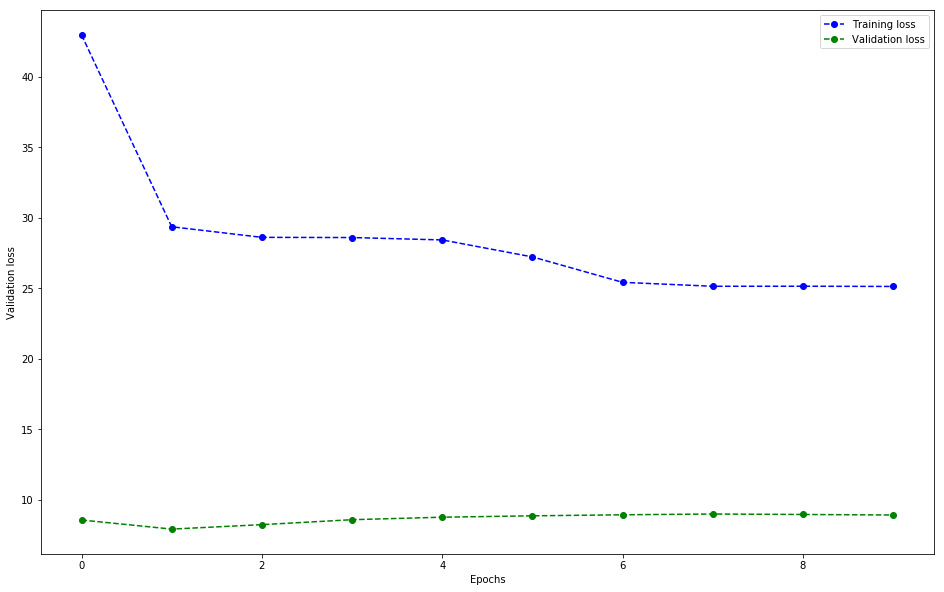

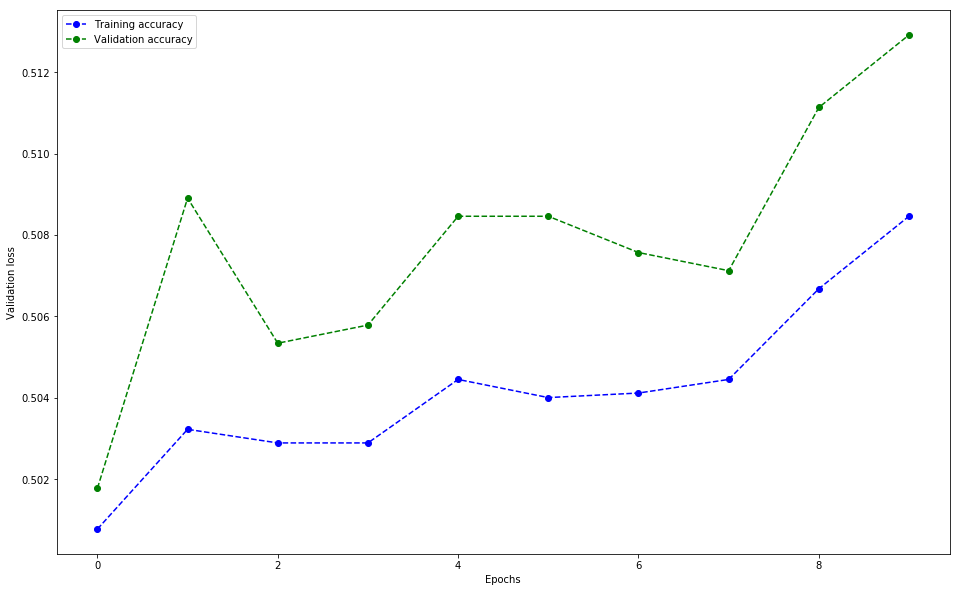

In [44]:

# L2
network_6 = models.Sequential()
network_6.add(layers.Dense(500,kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(input_shape,)))
network_6.add(layers.Dense(500,kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(input_shape,)))
network_6.add(layers.Dense(500,kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(input_shape,)))
network_6.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_6 = prepare_and_fit(network_5, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_6['history'], epochs)
plot_accuracy(result_6['history'],epochs)

Both L1 and L2 reguralizations worsten the results.

### Dropout


Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 10s 1ms/step - loss: 1.9026 - acc: 0.5639 - val_loss: 1.3008 - val_acc: 0.7035
Epoch 2/10
8982/8982 [==============================] - 8s 861us/step - loss: 1.0870 - acc: 0.7521 - val_loss: 1.0696 - val_acc: 0.7658
Epoch 3/10
8982/8982 [==============================] - 8s 875us/step - loss: 0.8128 - acc: 0.8087 - val_loss: 0.9746 - val_acc: 0.7752
Epoch 4/10
8982/8982 [==============================] - 8s 900us/step - loss: 0.6035 - acc: 0.8616 - val_loss: 0.9471 - val_acc: 0.7898
Epoch 5/10
8982/8982 [==============================] - 8s 859us/step - loss: 0.4541 - acc: 0.8957 - val_loss: 0.9413 - val_acc: 0.7876
Epoch 6/10
8982/8982 [==============================] - 8s 895us/step - loss: 0.3763 - acc: 0.9112 - val_loss: 0.9215 - val_acc: 0.8063
Epoch 7/10
8982/8982 [==============================] - 8s 911us/step - loss: 0.2896 - acc: 0.9293 - val_loss: 0.9754 - val_acc: 0.7983
E

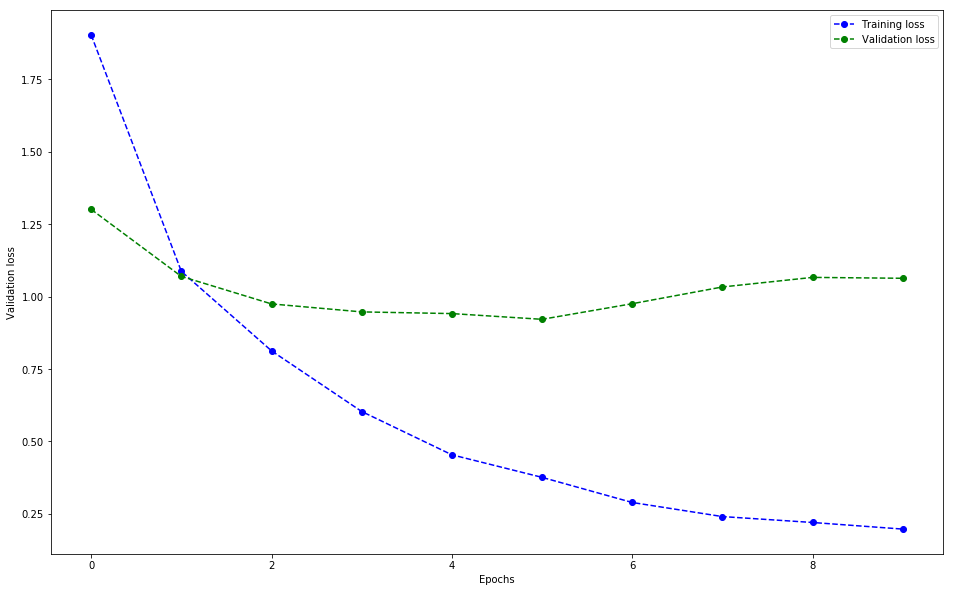

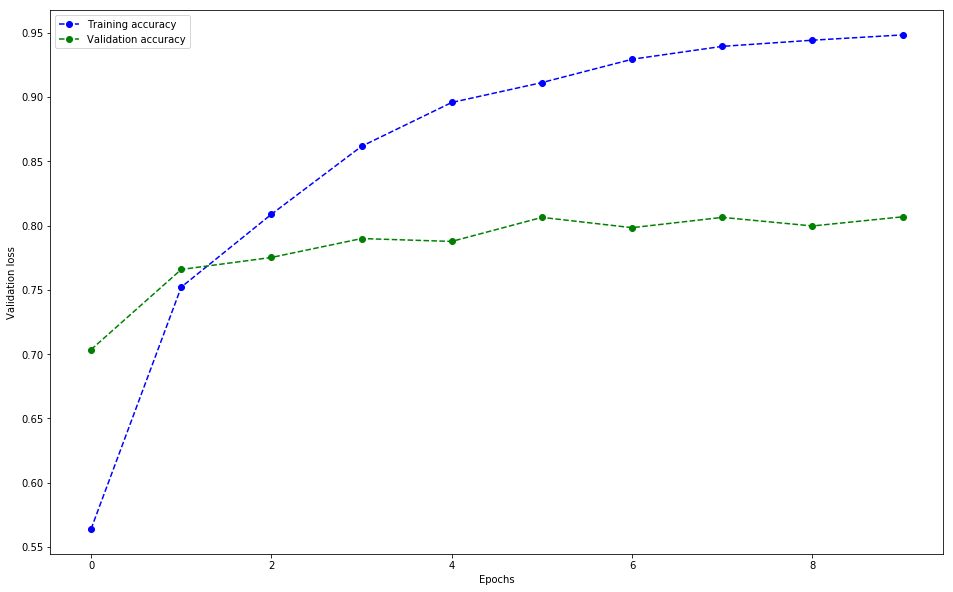

In [47]:
network_8 = models.Sequential()
network_8.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_8.add(layers.Dropout(0.5))
network_8.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_8.add(layers.Dropout(0.5))
network_8.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_8 = prepare_and_fit(network_8, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_8['history'], epochs)
plot_accuracy(result_8['history'],epochs)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 11s 1ms/step - loss: 1.9024 - acc: 0.5655 - val_loss: 1.3472 - val_acc: 0.6866
Epoch 2/10
8982/8982 [==============================] - 7s 811us/step - loss: 1.1196 - acc: 0.7481 - val_loss: 1.0791 - val_acc: 0.7498
Epoch 3/10
8982/8982 [==============================] - 8s 927us/step - loss: 0.8309 - acc: 0.8083 - val_loss: 0.9939 - val_acc: 0.7707
Epoch 4/10
8982/8982 [==============================] - 9s 964us/step - loss: 0.6156 - acc: 0.8573 - val_loss: 0.9728 - val_acc: 0.7765
Epoch 5/10
8982/8982 [==============================] - 8s 911us/step - loss: 0.4791 - acc: 0.8859 - val_loss: 0.9237 - val_acc: 0.7952
Epoch 6/10
8982/8982 [==============================] - 10s 1ms/step - loss: 0.3724 - acc: 0.9106 - val_loss: 0.9608 - val_acc: 0.7996
Epoch 7/10
8982/8982 [==============================] - 8s 879us/step - loss: 0.3002 - acc: 0.9279 - val_loss: 1.0396 - val_acc: 0.7845
Ep

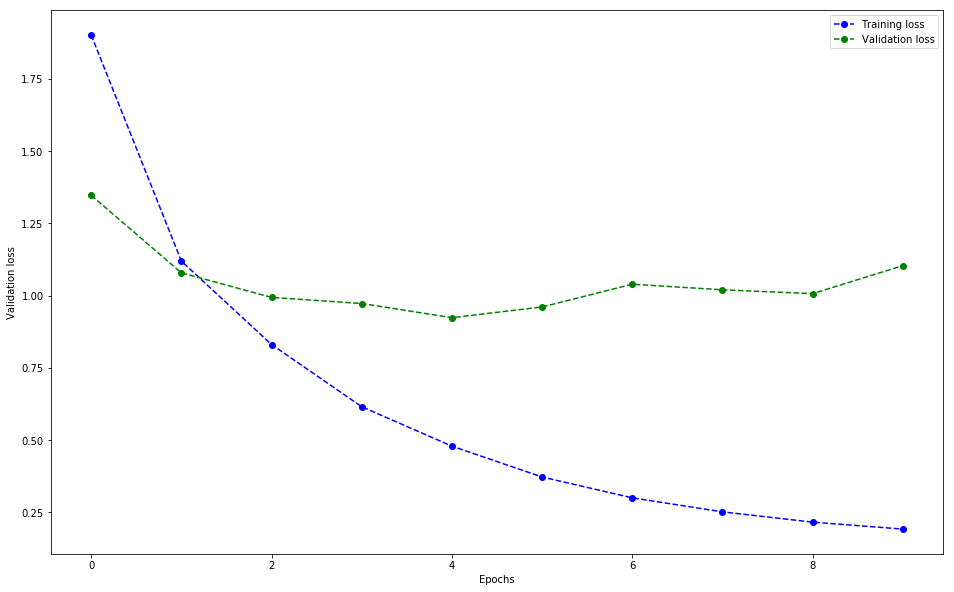

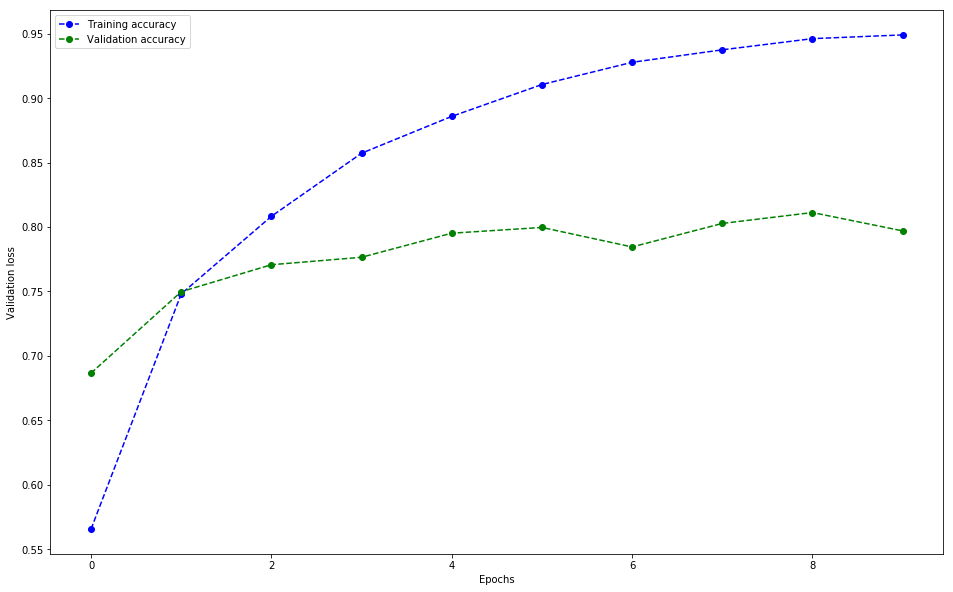

In [55]:
network_12 = models.Sequential()
network_12.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_12.add(layers.Dropout(0.5))
network_12.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_12.add(layers.Dropout(0.5))
network_12.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_12 = prepare_and_fit(network_12, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_12['history'], epochs)
plot_accuracy(result_12['history'],epochs)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 11s 1ms/step - loss: 1.8492 - acc: 0.5838 - val_loss: 1.2436 - val_acc: 0.7142
Epoch 2/10
8982/8982 [==============================] - 8s 835us/step - loss: 0.9548 - acc: 0.7816 - val_loss: 1.0138 - val_acc: 0.7671
Epoch 3/10
8982/8982 [==============================] - 8s 940us/step - loss: 0.6154 - acc: 0.8598 - val_loss: 0.9826 - val_acc: 0.7743
Epoch 4/10
8982/8982 [==============================] - 8s 865us/step - loss: 0.4091 - acc: 0.9029 - val_loss: 0.9889 - val_acc: 0.7738
Epoch 5/10
8982/8982 [==============================] - 7s 828us/step - loss: 0.2961 - acc: 0.9301 - val_loss: 0.9309 - val_acc: 0.8032
Epoch 6/10
8982/8982 [==============================] - 7s 833us/step - loss: 0.2277 - acc: 0.9439 - val_loss: 0.9778 - val_acc: 0.8014
Epoch 7/10
8982/8982 [==============================] - 8s 855us/step - loss: 0.2096 - acc: 0.9431 - val_loss: 0.9708 - val_acc: 0.8032
E

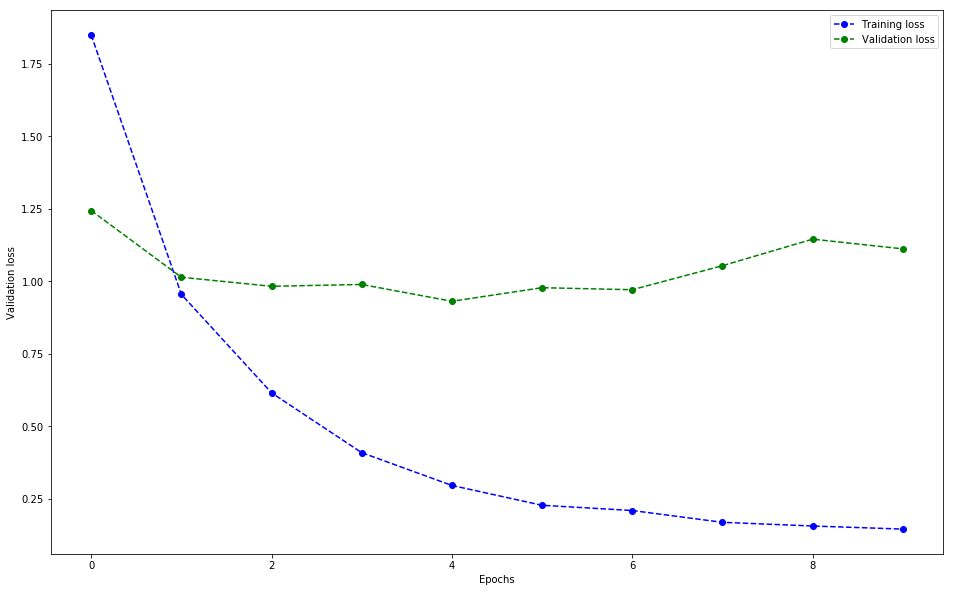

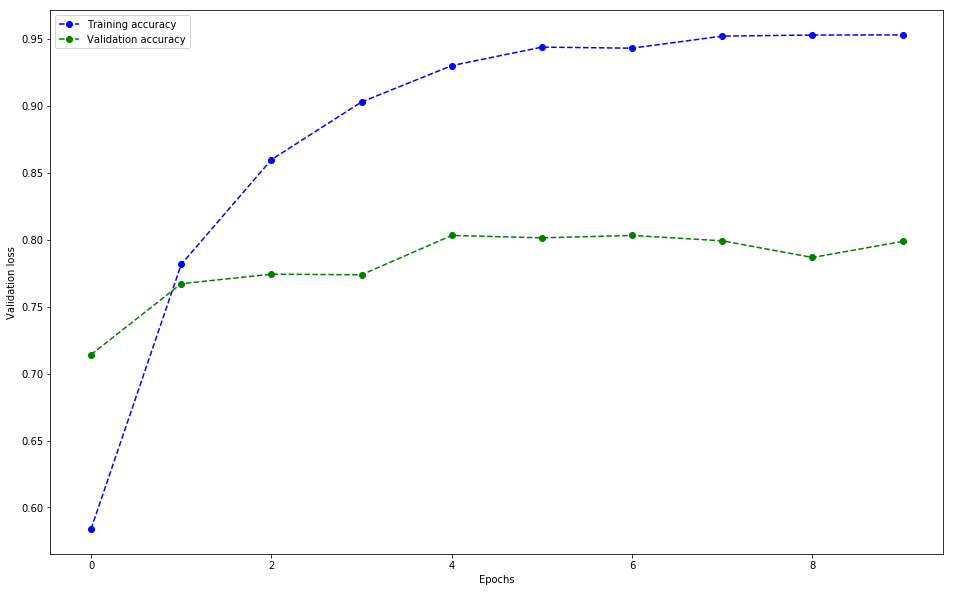

In [50]:
# With smaller dropout

network_9 = models.Sequential()
network_9.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_9.add(layers.Dropout(0.3))
network_9.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_9.add(layers.Dropout(0.3))
network_9.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_9 = prepare_and_fit(network_9, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_9['history'], epochs)
plot_accuracy(result_9['history'],epochs)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 11s 1ms/step - loss: 1.8853 - acc: 0.5647 - val_loss: 1.2753 - val_acc: 0.7106
Epoch 2/10
8982/8982 [==============================] - 8s 872us/step - loss: 1.0815 - acc: 0.7489 - val_loss: 1.0600 - val_acc: 0.7618
Epoch 3/10
8982/8982 [==============================] - 8s 861us/step - loss: 0.7785 - acc: 0.8238 - val_loss: 0.9388 - val_acc: 0.7876
Epoch 4/10
8982/8982 [==============================] - 8s 863us/step - loss: 0.5566 - acc: 0.8722 - val_loss: 0.9258 - val_acc: 0.7952
Epoch 5/10
8982/8982 [==============================] - 8s 941us/step - loss: 0.4246 - acc: 0.9008 - val_loss: 1.0128 - val_acc: 0.7738
Epoch 6/10
8982/8982 [==============================] - 8s 936us/step - loss: 0.3496 - acc: 0.9181 - val_loss: 0.9492 - val_acc: 0.8068
Epoch 7/10
8982/8982 [==============================] - 9s 1ms/step - loss: 0.2763 - acc: 0.9331 - val_loss: 0.9977 - val_acc: 0.7996
Epo

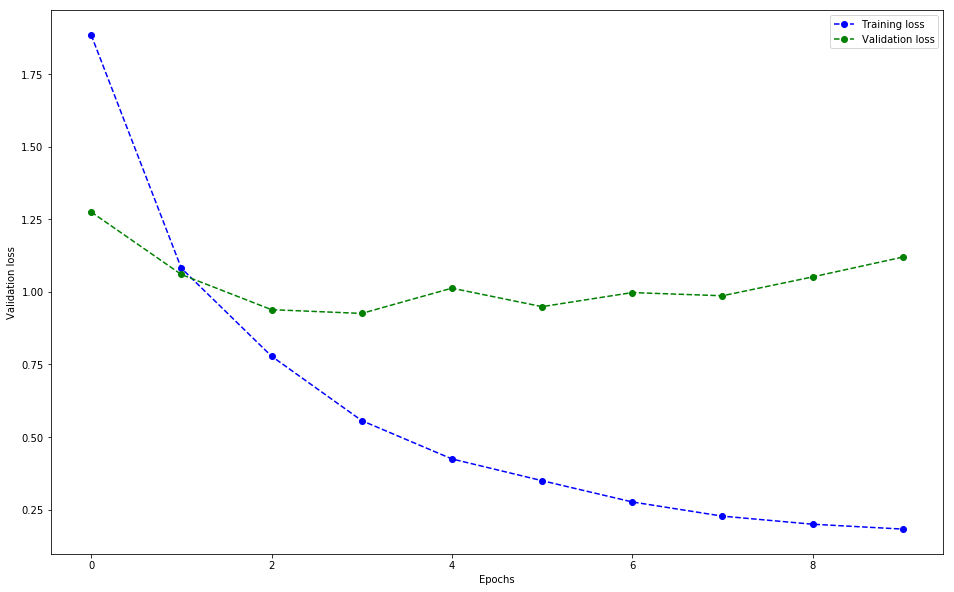

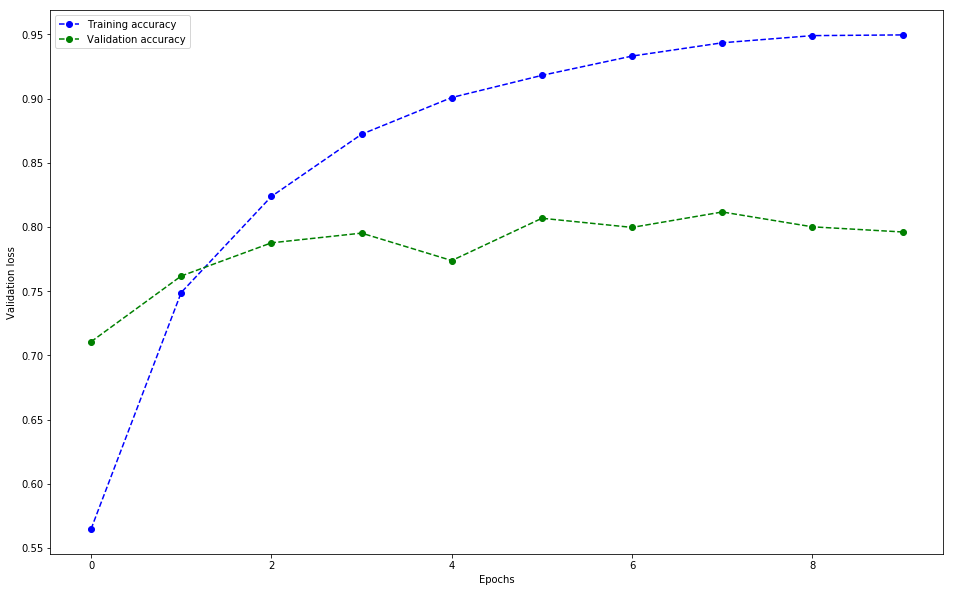

In [51]:
network_10 = models.Sequential()
network_10.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_10.add(layers.Dropout(0.5))
network_10.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_10.add(layers.Dropout(0.4))
network_10.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_10 = prepare_and_fit(network_10, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_10['history'], epochs)
plot_accuracy(result_10['history'],epochs)

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 10s 1ms/step - loss: 2.0066 - acc: 0.5481 - val_loss: 1.3318 - val_acc: 0.7061
Epoch 2/10
8982/8982 [==============================] - 7s 743us/step - loss: 1.1811 - acc: 0.7285 - val_loss: 1.1078 - val_acc: 0.7547
Epoch 3/10
8982/8982 [==============================] - 6s 722us/step - loss: 0.9037 - acc: 0.7914 - val_loss: 0.9951 - val_acc: 0.7765
Epoch 4/10
8982/8982 [==============================] - 7s 725us/step - loss: 0.7110 - acc: 0.8344 - val_loss: 0.9388 - val_acc: 0.7867
Epoch 5/10
8982/8982 [==============================] - 7s 812us/step - loss: 0.5637 - acc: 0.8672 - val_loss: 0.9154 - val_acc: 0.8005
Epoch 6/10
8982/8982 [==============================] - 7s 774us/step - loss: 0.4580 - acc: 0.8903 - val_loss: 0.9522 - val_acc: 0.7925
Epoch 7/10
8982/8982 [==============================] - 7s 762us/step - loss: 0.3804 - acc: 0.9095 - val_loss: 0.9730 - val_acc: 0.7961
E

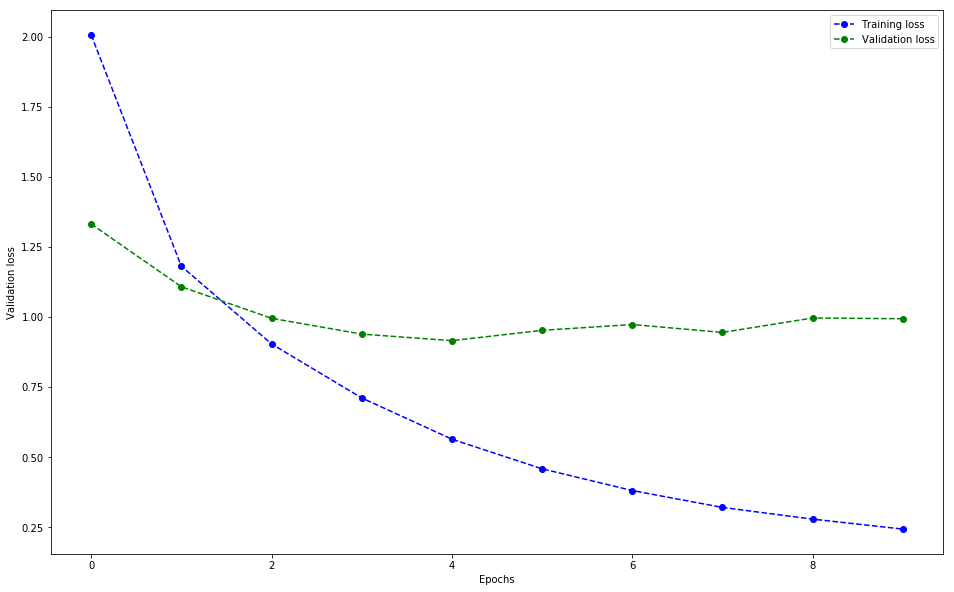

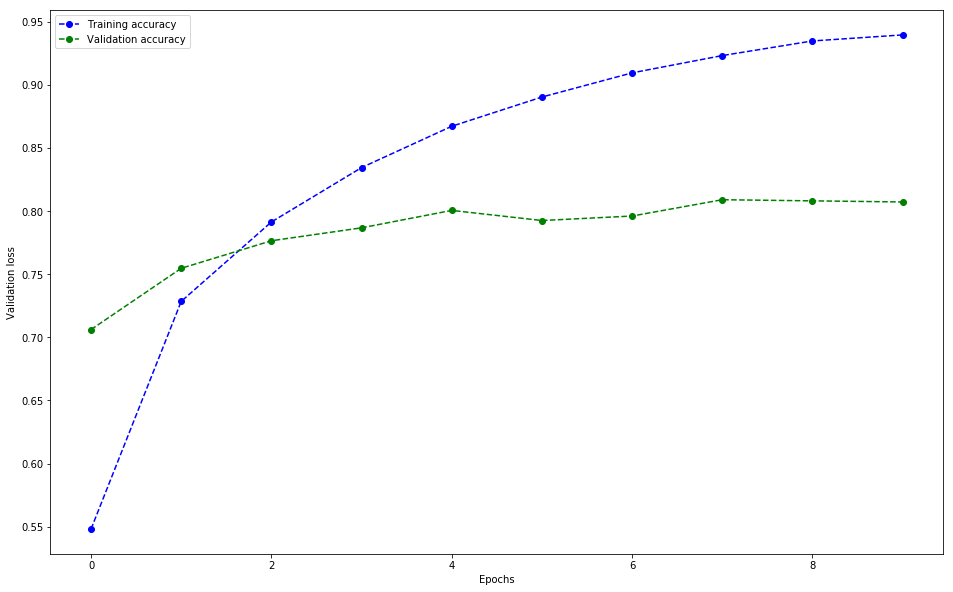

In [54]:
network_11 = models.Sequential()
network_11.add(layers.Dense(500, activation='relu', input_shape=(input_shape,)))
network_11.add(layers.Dropout(0.5))
network_11.add(layers.Dense(200, activation='relu'))
network_11.add(layers.Dropout(0.5))
network_11.add(layers.Dense(number_of_classes, activation='softmax'))

epochs=10
result_11 = prepare_and_fit(network_11, epochs, x_train, x_test, one_hot_train_labels, one_hot_test_labels)
plot_loss(result_11['history'], epochs)
plot_accuracy(result_11['history'],epochs)

## Sumarization

Best achieved results has model 11. It has dance layers of both 500 and 200 size and dropout. 

Test loss 0.9937274269195719 , test accuracy 0.807212822796082